## 1. Introdução

***
A análise abaixo foi realizada utilizando os dados dos acidentes de trânsito que ocorreram no estado de Vitória na Austrália no período de 2012 - 2023 disponibilizados no seguinte link: https://www.kaggle.com/datasets/jaspreetkhokhar/victoria-road-crash-data-2012-2023
***
A pretenção dessa análise é identificar as principais causas de acidente, quando ocorre o maior número de acidentes e os tipos de acidentes que mais ocorrem. Ademais, procura encontrar se há alguma relação entre esses fatores.
***
#### Perguntas as serem respondidas:
- Qual o tipo de acidente mais comum?
- Qual a principal causa dos acidentes?
- O número de acidentes vem reduzindo com o passar do tempo?
- Que tipo de acidente mais ocorreu em cada ano?
***

## 2. Carregando Bibliotecas

In [5]:
import pandas as pd
import numpy as np
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 3. Carregando Dataset

In [7]:
#rc = road crash
rc = pd.read_csv('Vic_Road_Crash_Data.csv')
df = pd.DataFrame(rc)

In [8]:
rc.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'LIGHT_CONDITION', 'NODE_ID', 'ROAD_GEOMETRY_DESC',
       'SEVERITY', 'SPEED_ZONE', 'RMA'],
      dtype='object')

In [9]:
rc.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,NODE_ID,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
0,T20120000060,1/1/2012,19:40:00,6,Vehicle overturned (no collision),1,Sunday,184,OUT OF CONTROL ON CARRIAGEWAY (ON BEND),1,248602,T intersection,2,60,Local Road
1,T20120000028,1/1/2012,04:00:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,5,248598,T intersection,2,100,Local Road
2,T20120000021,1/1/2012,07:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,1,248597,Not at intersection,3,50,Local Road
3,T20120000056,1/1/2012,16:15:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,1,249133,T intersection,2,100,Local Road
4,T20120000018,1/1/2012,05:15:00,4,Collision with a fixed object,1,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,5,22636,Cross intersection,3,100,Arterial Highway


In [10]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152445 entries, 0 to 152444
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ACCIDENT_NO         152445 non-null  object
 1   ACCIDENT_DATE       152445 non-null  object
 2   ACCIDENT_TIME       152445 non-null  object
 3   ACCIDENT_TYPE       152445 non-null  int64 
 4   ACCIDENT_TYPE_DESC  152445 non-null  object
 5   DAY_OF_WEEK         152445 non-null  int64 
 6   DAY_WEEK_DESC       152445 non-null  object
 7   DCA_CODE            152445 non-null  int64 
 8   DCA_DESC            152445 non-null  object
 9   LIGHT_CONDITION     152445 non-null  int64 
 10  NODE_ID             152445 non-null  int64 
 11  ROAD_GEOMETRY_DESC  152445 non-null  object
 12  SEVERITY            152445 non-null  int64 
 13  SPEED_ZONE          152445 non-null  int64 
 14  RMA                 152445 non-null  object
dtypes: int64(7), object(8)
memory usage: 17.4+ MB


**Os datatypes estão corretos**

In [12]:
rc.describe()

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,SEVERITY,SPEED_ZONE
count,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000
mean,2.107980,3.888727,138.135826,1.828745,304940.779888,2.593407,67.038834
std,1.880543,1.983988,25.813233,1.538316,251440.025570,0.524761,17.853081
min,1.000000,0.000000,100.000000,1.000000,4.000000,1.000000,30.000000
25%,1.000000,2.000000,120.000000,1.000000,49775.000000,2.000000,60.000000
50%,1.000000,4.000000,130.000000,1.000000,278386.000000,3.000000,60.000000
75%,3.000000,6.000000,167.000000,2.000000,358189.000000,3.000000,80.000000
max,9.000000,7.000000,199.000000,9.000000,800990.000000,4.000000,100.000000


**Os dados se apresentam integros e sem outliers**

## 4. Limpando os dados

In [15]:
duplicados = rc[rc.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [ACCIDENT_NO, ACCIDENT_DATE, ACCIDENT_TIME, ACCIDENT_TYPE, ACCIDENT_TYPE_DESC, DAY_OF_WEEK, DAY_WEEK_DESC, DCA_CODE, DCA_DESC, LIGHT_CONDITION, NODE_ID, ROAD_GEOMETRY_DESC, SEVERITY, SPEED_ZONE, RMA]
Index: []


**Não foram encontrados dados duplicados**

In [17]:
rc.isnull().sum()


ACCIDENT_NO           0
ACCIDENT_DATE         0
ACCIDENT_TIME         0
ACCIDENT_TYPE         0
ACCIDENT_TYPE_DESC    0
DAY_OF_WEEK           0
DAY_WEEK_DESC         0
DCA_CODE              0
DCA_DESC              0
LIGHT_CONDITION       0
NODE_ID               0
ROAD_GEOMETRY_DESC    0
SEVERITY              0
SPEED_ZONE            0
RMA                   0
dtype: int64

**Não há dados faltantes**

## 5. Analise Univariada

### 5.1 Dia da Semana

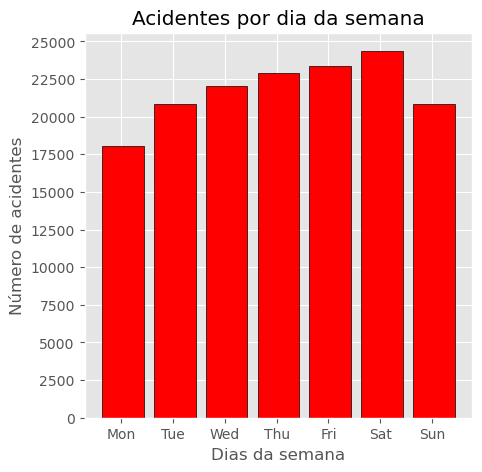

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

hist_data= plt.hist(rc.DAY_WEEK_DESC, align='mid', edgecolor='black', bins=7, color = 'r', rwidth = 0.8)
ax.set_ylabel('Número de acidentes')
ax.set_xlabel('Dias da semana')
ax.set_title('Acidentes por dia da semana')
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000])
ax.set_xticks(hist_data[1][:-1] + 0.4)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

***
O dia da semana com maior número de acidentes é no sábado, isso pode ocorrer devido a maior circulação de carros de passeio.
***

### 5.2 Condição de Luz

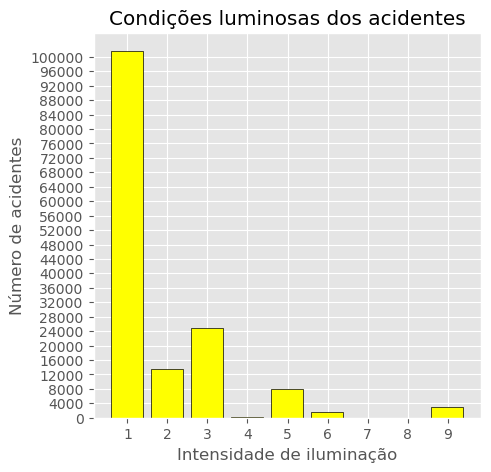

In [24]:
fig, ax = plt.subplots(figsize=(5,5))

hist_data= plt.hist(rc.LIGHT_CONDITION, align='mid', edgecolor='black', bins=9, color = 'yellow', rwidth = 0.8)
ax.set_xticks(hist_data[1][:-1] + 0.45)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7','8','9'])
plt.yticks([0,4000,8000,12000,16000,20000,24000,28000,32000,36000,40000,44000,48000,52000,56000,60000,64000,68000,72000,76000,80000,84000,88000,92000,
96000,100000])

ax.set_ylabel('Número de acidentes')
ax.set_xlabel('Intensidade de iluminação')
ax.set_title('Condições luminosas dos acidentes')
plt.show()

***
A baixa luminosidade se mostra como um fator de risco, tendo em vista que o número de acidentes no menor nível de luminosidade é maior que a soma de todos os outros níveis de luminosidade.
***

### 5.3 Zona de Velocidade

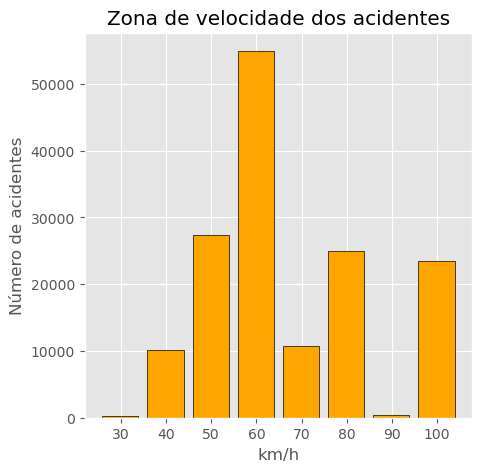

In [27]:
fig, ax = plt.subplots(figsize=(5,5))

hist_data= plt.hist(rc.SPEED_ZONE, align='mid', bins = 8, edgecolor='black', color = 'orange', rwidth = 0.8)
ax.set_xticks(hist_data[1][:-1] + 4.5)
ax.set_xticklabels(['30', '40', '50', '60', '70', '80', '90','100'])


ax.set_ylabel('Número de acidentes')
ax.set_xlabel('km/h')
ax.set_title('Zona de velocidade dos acidentes')
plt.show()

***
A variável Zona de Velocidade dos acidentes, apresenta maior ocorrência em zonas de 60km/h. Uma possiblidade é que seja uma zona de velocidade mais comum.
***

### 5.4 Gravidade

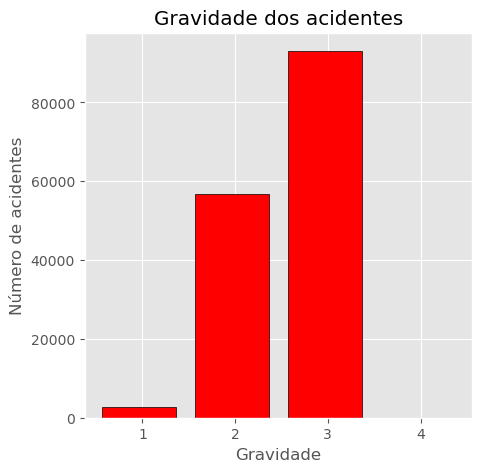

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

hist_data= plt.hist(rc.SEVERITY, align='mid', edgecolor='black', bins=4, color = 'r', rwidth = 0.8)
ax.set_xticks(hist_data[1][:-1] + 0.4)
ax.set_xticklabels(['1', '2', '3', '4'])
ax.set_ylabel('Número de acidentes')
ax.set_xlabel('Gravidade')
ax.set_title('Gravidade dos acidentes')
plt.show()

In [32]:
rc.SEVERITY.value_counts()

SEVERITY
3    93049
2    56797
1     2595
4        4
Name: count, dtype: int64

***
A maior parte dos acidentes tem nivel de gravidade 2 ou 3 e o número de ocorrências de acidentes de baixa gravidade (1) são expressivamente maiores do que os acidentes de máxima gravidade (4). Todavia, a soma do número de acidentes de gravidade 1 ou 2 ainda é menor que a quantidade total de acidentes de gravidade 3. Logo, os acidentes em sua maioria são acidentes mais graves, caracterizando a estrada como perigosa.
***

### 5.5 Tipos de Acidente

In [37]:
rc.ACCIDENT_TYPE_DESC.value_counts()

ACCIDENT_TYPE_DESC
Collision with vehicle               100648
Collision with a fixed object         23430
Struck Pedestrian                     12445
Vehicle overturned (no collision)      6528
No collision and no object struck      5559
Struck animal                          1519
collision with some other object       1290
Fall from or in moving vehicle          894
Other accident                          132
Name: count, dtype: int64

## 6. Análise Bivariada

### 6.1 Tipos de acidente e Severidade

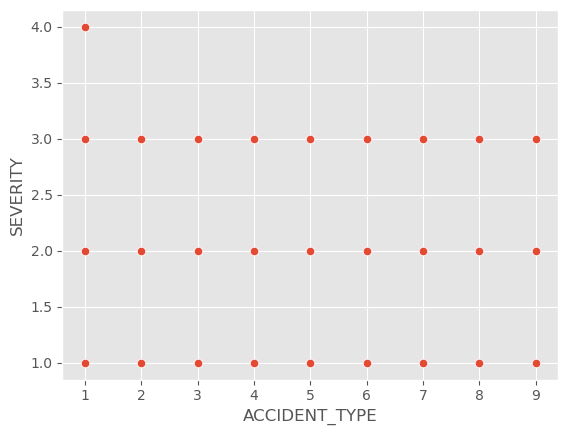

In [43]:
scatter_data = sns.scatterplot(x='ACCIDENT_TYPE', y='SEVERITY', data = rc)

***
A partir desse gráfico de dispersão podemos perceber que o único tipo de acidente que teve a severidade máxima foram as colisões com outro veículo.
***


In [47]:
query = rc.query("ACCIDENT_TYPE == 2 and DAY_WEEK_DESC == 'Saturday'")
print(query)

         ACCIDENT_NO ACCIDENT_DATE ACCIDENT_TIME  ACCIDENT_TYPE  \
377     T20120001019     14/1/2012      22:30:00              2   
608     T20120001566     21/1/2012      23:30:00              2   
611     T20120001571     21/1/2012      23:40:00              2   
627     T20120001553     21/1/2012      18:00:00              2   
868     T20120003312     28/1/2012      20:00:00              2   
...              ...           ...           ...            ...   
152212  T20230022292     23/9/2023      10:00:00              2   
152214  T20230022277     23/9/2023      01:44:00              2   
152411  T20230022841     30/9/2023      11:00:00              2   
152414  T20230022844     30/9/2023      11:00:00              2   
152419  T20230023083     30/9/2023      23:10:00              2   

       ACCIDENT_TYPE_DESC  DAY_OF_WEEK DAY_WEEK_DESC  DCA_CODE  \
377     Struck Pedestrian            7      Saturday       104   
608     Struck Pedestrian            7      Saturday       102 

In [48]:
query = rc.query("ACCIDENT_TYPE == 2 and DAY_WEEK_DESC=='Monday'")
print(query)

         ACCIDENT_NO ACCIDENT_DATE ACCIDENT_TIME  ACCIDENT_TYPE  \
40      T20120000084      2/1/2012      12:00:00              2   
209     T20120000603      9/1/2012      19:00:00              2   
212     T20120000574      9/1/2012      12:46:00              2   
222     T20120000581      9/1/2012      08:58:00              2   
224     T20120000578      9/1/2012      13:15:00              2   
...              ...           ...           ...            ...   
151544  T20230020720      4/9/2023      21:10:00              2   
152010  T20230021849     18/9/2023      12:03:00              2   
152244  T20230022444     25/9/2023      14:00:00              2   
152248  T20230022588     25/9/2023      07:30:00              2   
152268  T20230022473     25/9/2023      15:30:00              2   

       ACCIDENT_TYPE_DESC  DAY_OF_WEEK DAY_WEEK_DESC  DCA_CODE  \
40      Struck Pedestrian            2        Monday       104   
209     Struck Pedestrian            2        Monday       102 

***
Apesar de o número de acidentes ser menor na segunda-feira (dia da semana com menor ocorrência de acidentes) há maior ocorrência de colisão de veículos com objetos parados do que no sábado (dia com maior ocorrência de acidentes).
***

In [141]:
for year in range(2012, 2024):
    query = rc[(rc['ACCIDENT_TYPE'] == 5) & (rc['ACCIDENT_DATE'].str.contains(str(year)))]
    print(f"{year}: {query.shape[0]}")

2012: 96
2013: 102
2014: 73
2015: 92
2016: 125
2017: 78
2018: 90
2019: 130
2020: 140
2021: 156
2022: 133
2023: 75
